In [1]:
%load_ext tikzmagic
%matplotlib inline

# 최대가능도추정

지금까지 각종 확률분포의 모수를 추정하는 공식들을 설명했다. 이 공식들은 <b>최대가능도추정(MLE: Maximum Likelihood Estimation)</b>이라는 이론에 기반하여 유도된 공식이다. 이 절에서는 최대가능도추정에 대해 간단히 소개한다. 이 절은 모수추정공식이 어떻게 유도되었는지를 설명하기 위한 수학적인 내용이다.

## 가능도함수

다음과 같이 표본값이 $x$, 모수가 $\theta$인 확률분포함수가 있다고 가정하자.

$$ p(x;\theta) $$

이 식에서 $\theta$는 모든 모수를 합쳐서 나타낸 기호다. 예를 들어 확률분포가 베르누이분포라면 모수 $\theta = \mu$가 되고 이항분포라면 $\theta = (N, \mu)$, 정규분포라면 $\theta = (\mu, \sigma^2)$가 된다.

확률분포함수에서는 변수가 $x$고 모수 $\theta$는 변하지 않는 상수다. 그런데 같은 함수를 $x$가 상수이고 $\theta$가 변수라고 가정하면 <b>가능도함수(likelihood function)</b>라고 부른다. 가능도 함수는 $L(\theta; x)$로 표기한다. 함수의 수식은 확률분포함수 $p(x;\theta)$나 $L(\theta; x)$나 똑같다.

예를 들어 정규분포 가능도함수는 $\mu$와 $\sigma^2$를 변수로 가지는 2차원 함수다.

$$  L(\mu, \sigma^2; x) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

만약 표본값 $x=0$이면 다음과 같은 모양을 띄게 된다.

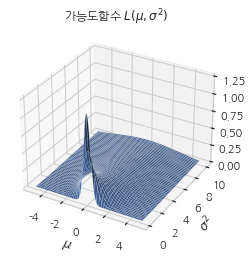

In [2]:
import numpy as np

mus = np.linspace(-5, 5, 1000)
sigma2s = np.linspace(0.1, 10, 1000)
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('가능도함수 $L(\mu, \sigma^2)$')
plt.show()

확률분포함수의 값은 모수 $\theta$가 고정되었을 때 값 $x$가 나올 가능성을 뜻하지만 가능도함수의 값은 값 $x$가 관측되었을 때 모수가 $\theta$이라는 값을 가질 가능성을 나타낸다.

## 최대가능도추정

최대가능도추정은 주어진 표본값에 대해 가능도함수 $L(\theta;x)$의 값을 가장 크게 하는 모수 $\theta$가 가장 가능성이 높은 모수값이라고 추정하는 방법이다. 이 방법으로 찾은 모수는 기호로 $\hat\theta_{\text{MLE}}$와 같이 표시한다. 수식으로는 다음과 같이 정의한다.

$$ \hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; x) $$


이 식에서 $\arg \max_{\theta}$는 그 다음에 오는 함수의 값을 가장 크게 만드는 변수값을 뜻한다.

예를 들어 분산 $\sigma^2 = 1$인 정규분포를 따르는 확률변수가 있고 이 확률변수로부터 $x_1=1$이라는 하나의 표본을 얻었다고 가정하자.  모수 $\mu$는 어떻게 추정할 것인가? 최대가능도추정 방법에서는 여러가지 $\mu$ 값을 가정하여 각각의 가능도를 구한다.

만약 모수값이 $\mu=-1$이라면 확률분포함수는 다음과 같아진다.

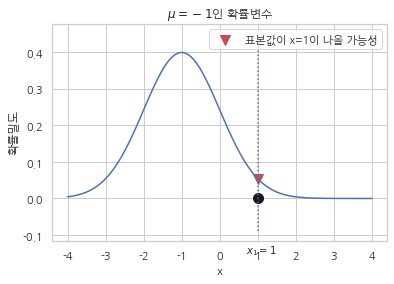

In [3]:
from scipy.stats import norm 

x = np.linspace(-4, 4, 100)

plt.scatter(1, norm(loc=-1).pdf(1), s=100, c='r', marker='v', label="표본값이 x=1이 나올 가능성")
plt.plot(x, sp.stats.norm(loc=-1).pdf(x))
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("$\mu=-1$인 확률변수")
plt.show()

이 확률분포로부터 표본값 $x_1=1$이 나올 가능성은 약 0.054다.

In [4]:
norm(loc=-1).pdf(1)

0.05399096651318806

이번에는 모수값이 $\mu=0$일 경우를 생각하자.

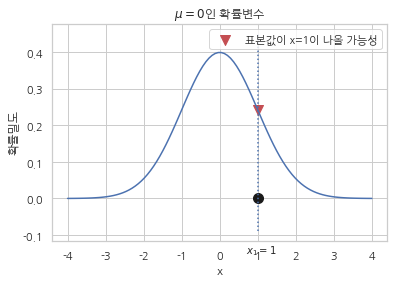

In [5]:
plt.scatter(1, norm(loc=0).pdf(1), s=100, c='r', marker='v', label="표본값이 x=1이 나올 가능성")
plt.plot(x, sp.stats.norm(loc=0).pdf(x))
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("$\mu=0$인 확률변수")
plt.show()

이 확률분포로부터 표본값  𝑥1=1 이 나올 가능성은 약 0.242다.

In [6]:
norm(loc=0).pdf(1)

0.24197072451914337

마지막으로 모수값이 $\mu=1$일 경우를 생각하자.

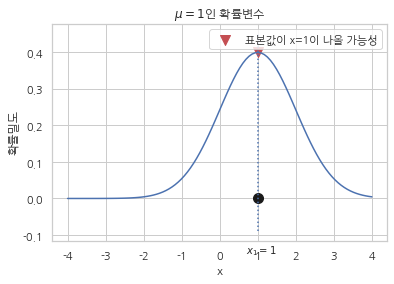

In [7]:
plt.scatter(1, norm(loc=1).pdf(1), s=100, c='r', marker='v', label="표본값이 x=1이 나올 가능성")
plt.plot(x, sp.stats.norm(loc=1).pdf(x))
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("$\mu=1$인 확률변수")
plt.show()

이 확률분포로부터 표본값 $𝑥_1=1$이 나올 가능성은 약 0.399다.

In [8]:
norm(loc=1).pdf(1)

0.3989422804014327

지금까지의 결과를 표로 정리하면 다음과 같다.

| 확률분포 | $x=1$이 나올 가능성 |
|-|-|
| 모수가 $\mu=-1$인 확률분포 | 0.054 |
| 모수가 $\mu=0$인 확률분포 | 0.242 |
| 모수가 $\mu=1$인 확률분포 | 0.399  |

이 3가지 확률분포 중 어떻 것을 선택할 것인가? 최대가능도추정 방법에서는 $x=1$이 나올 가능성이 가장 높은 $\mu=1$을 선택한다. 